In [1]:
import nltk

# 말뭉치 가져오기

In [2]:
nltk.download('book',quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma_raw[:1000]

"[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice of 

# 토큰 생성
- 자연어 문서에서 분석을 위해 긴 문자열을 작은 단위로 나누는 것
- 문장 단위, 단어 단위, 정규표현 식으로 나눌 수 있음

In [5]:
# 문장단위 토큰 생성
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:10000])[1]) #2번째 문장

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.


In [6]:
# 단어단위 토큰 생성
from nltk.tokenize import word_tokenize
print(word_tokenize(emma_raw[50:100]))

['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [7]:
# 정규표현 생성
from nltk.tokenize import RegexpTokenizer
retTokenize = RegexpTokenizer("[\w]+")
retTokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

# 형태소 분석
- 형태소 : 언어학에서 일정한 의미가 있는 가장 작은 말의 단위
- 보통 자연어 처리에서 토큰을 형태소를 이용
- 형태소 분석 : 단어로부터 어근, 접두사 접미사, 품사 등 다양한 언어적 속성을 파악하고
이를 이용하여 형태소를 찾아내거나 처리하는 작업
- 형태소 분석의 예 
    - 어간 추출 
    - 원형 복원
    - 품사 부착
    

#  어간 추출 
- PorterStemmer, LandcasterStemmer 제공
- 어간 추출은 단순히 어미만 제거함

In [8]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly','files','flying','flew','flown']
print("Porter stemmer:",[st1.stem(w) for w in words])
print("LancasterStemmer:",[st2.stem(w) for w in words])

Porter stemmer: ['fli', 'file', 'fli', 'flew', 'flown']
LancasterStemmer: ['fly', 'fil', 'fly', 'flew', 'flown']


In [9]:
list1 = []
for w in words:
    list1.append(st1.stem(w))
print(list1)

['fli', 'file', 'fli', 'flew', 'flown']


In [10]:
list2=[st1.stem(w) for w in words]
print(list1)

['fli', 'file', 'fli', 'flew', 'flown']


# 원형복원
- 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업

In [11]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
lm=WordNetLemmatizer()
[lm.lemmatize(w,'v') for w in words]

['fly', 'file', 'fly', 'fly', 'fly']

# 품사부착
- 품사는 낱말을 문법적인 기능이나 형태, 듯에 따라 구분한 것
- 품사의 예
    - NNP : 단순고유명사
    - VB : 동사
    - VBP : 동사현재형
    - NN : 명사
    - DT : 관형사

In [13]:
from nltk.tag import pos_tag
sentence='Emma refused to permit us to obtain the redfuse permit'
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('redfuse', 'NN'),
 ('permit', 'NN')]

In [14]:
noun_list = [t[0] for t in tagged_list if t[1]=="NN"]
noun_list

['redfuse', 'permit']

In [15]:
list1=[]
for t in tagged_list :
    if t[1]=='NN':
        list1.append(t[0])
    else :
        list1.append('_')
list1

['_', '_', '_', '_', '_', '_', '_', '_', 'redfuse', 'permit']

In [16]:
noun_list1=[t[0] if t[1]=='NN' else '-' for t in tagged_list]
noun_list1

['-', '-', '-', '-', '-', '-', '-', '-', 'redfuse', 'permit']

In [17]:
from nltk.tag import untag
untag_list = untag(tagged_list)
untag_list

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'redfuse',
 'permit']

# Text 클래스
- 문서 분석에 유용한 메소드 제공

In [18]:
from nltk import Text
text = Text(retTokenize.tokenize(emma_raw))
print(text)

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>


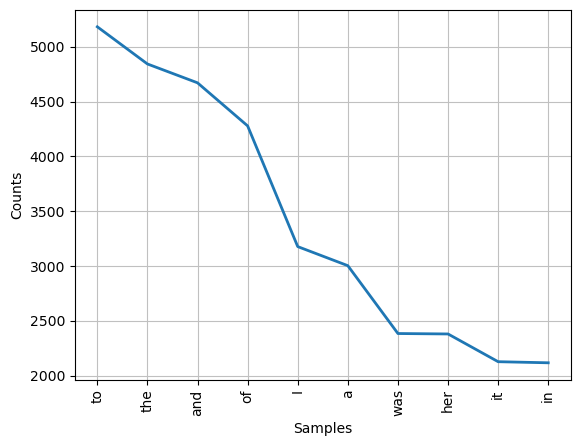

In [19]:
import matplotlib.pyplot as plt
text.plot(10)
plt.show()

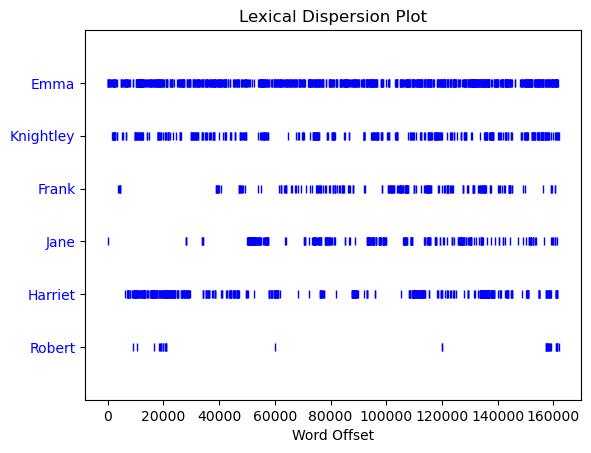

In [20]:
text.dispersion_plot(['Emma','Knightley','Frank','Jane','Harriet','Robert'])

In [21]:
#concordance : 단어가 사용된 위치를 직접 표시하ㅁ, 문맥의 정보를 보여줌

In [22]:
text.concordance('Emma') 

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [23]:
# similar : 같은 문맥에서 주어진 단어 대신 사용된 회수가 높은 단어를 찾아줌

In [24]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [25]:
text.common_contexts('Jane','her')

('The following word(s) were not found:', 'j a n e')


# FreqDist
- 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스
- vocab() 메소드로 추출

In [26]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [27]:
from nltk import FreqDist
stopwords= ['Mr','Mr.s','Miss','Mr','Mrs','Dear','A','No','Ah','Oh']
emma_token = pos_tag(retTokenize.tokenize(emma_raw))
name_list=[t[0] for t in emma_token if t[1]=='NNP' and t[0] not in stopwords] 

In [28]:
name_list

['Jane',
 'Austen',
 'VOLUME',
 'Emma',
 'Woodhouse',
 'Sixteen',
 'Taylor',
 'Woodhouse',
 'Emma',
 'Between',
 'Taylor',
 'Emma',
 'Taylor',
 'Emma',
 'Sorrow',
 'Taylor',
 'Taylor',
 'Emma',
 'Weston',
 'Taylor',
 'Isabella',
 'How',
 'Emma',
 'Weston',
 'Taylor',
 'Woodhouse',
 'Her',
 'London',
 'October',
 'November',
 'Hartfield',
 'Christmas',
 'Isabella',
 'Highbury',
 'Hartfield',
 'Taylor',
 'Emma',
 'Matrimony',
 'Taylor',
 'Taylor',
 'Hartfield',
 'Emma',
 'Poor',
 'Taylor',
 'Weston',
 'Weston',
 'Taylor',
 'How',
 'Randalls',
 'James',
 'Weston',
 'Weston',
 'James',
 'Randalls',
 'Hannah',
 'Nobody',
 'Hannah',
 'James',
 'James',
 'Whenever',
 'Taylor',
 'Whenever',
 'James',
 'Emma',
 'Knightley',
 'Isabella',
 'Highbury',
 'London',
 'Hartfield',
 'Brunswick',
 'Square',
 'Woodhouse',
 'Knightley',
 'Isabella',
 'Woodhouse',
 'Knightley',
 'Dirty',
 'Look',
 'Well',
 'Who',
 'Taylor',
 'Tis',
 'Poor',
 'Woodhouse',
 'Taylor',
 'Emma',
 'Emma',
 'Woodhouse',
 'My',
 '

In [29]:
fd_name = FreqDist(name_list)
fd_name

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

In [30]:
print(fd_name.N()) # 전체 단어의 수 
print(fd_name['Emma']) # 주어진 단어에 해당하는 빈도수
print(fd_name.freq('Emma')) # 단어의 출현 확률

7511
830
0.11050459326321395


In [31]:
fd_name.most_common(10) # 발생빈도 높은 10가지

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208)]

In [32]:
! pip install pillow --upgrade

# pip install wordcloud

In [33]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [39]:
im = Image.open('data/img.png')
mask_arr=np.array(im)

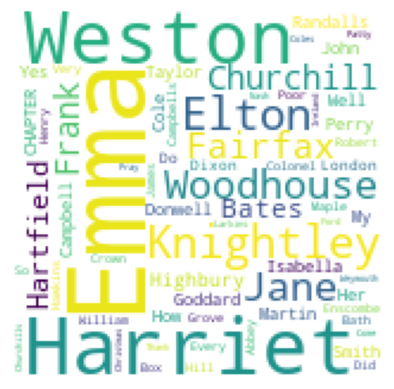

In [40]:
wc=WordCloud(width=1000, height=800, background_color='white', random_state=0,mask=mask_arr)
plt.imshow(wc.generate_from_frequencies(fd_name))
plt.axis('off')
plt.savefig('data/wc.png')
plt.show()